In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import numpy as np
import os


In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras import optimizers 
from keras.callbacks import TensorBoard,ModelCheckpoint
import argparse
from time import time

Using TensorFlow backend.


#Connecting with Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_dir='gdrive/My Drive/IndIan_Food_DatasetM/train'
test_dir='gdrive/My Drive/IndIan_Food_DatasetM/test'


In [0]:
!ls

gdrive	sample_data


In [0]:
model=VGG16(include_top=False,weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
batch_size=32

In [0]:
datagen_train = image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [0]:
datagen_test= image.ImageDataGenerator(rescale=1./255)

In [0]:
input_shape=(224,224)

In [0]:

generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

Found 3242 images belonging to 6 classes.


In [0]:

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 732 images belonging to 6 classes.


In [0]:
steps_train = 3242 // batch_size
steps_train


101

In [0]:
batch_size=32
steps_test = generator_test.n // batch_size
steps_test

22

In [0]:
num_classes = generator_train.num_classes
num_classes

6

In [0]:
#Creating Paths
def path_join(dirname, filenames):
  return [os.path.join(dirname,fname) for fname in filenames]
image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_test = path_join(test_dir, generator_test.filenames)

In [0]:
#Class Numbers
cls_train=generator_train.classes
cls_test=generator_train.classes

In [0]:
#CLass NAames
class_names=list(generator_train.class_indices.keys())

In [0]:
optimizer = optimizers.Adam()

In [0]:
loss = ['categorical_crossentropy']

In [0]:
metrics = ['categorical_accuracy']

## Freezing the Trainable Conv_layer

In [0]:
def print_layer_trainable(model):
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [0]:
print_layer_trainable()

False:	input_1
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [0]:
model.trainable = False

In [0]:
for layer in model.layers:
    layer.trainable = False

In [0]:
print_layer_trainable()

False:	input_1
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_pool
False:	block4_conv1
False:	block4_conv2
False:	block4_conv3
False:	block4_pool
False:	block5_conv1
False:	block5_conv2
False:	block5_conv3
False:	block5_pool


In [0]:
num_classes=6

x = model.output
x = Dense(128)(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model = Model(inputs=model.input, outputs=predictions)
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [0]:
epochs = 15
model.input.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(3)])

In [0]:
import time 
t=time.time()
history = model.fit_generator(generator=generator_train,epochs=epochs,
                                  steps_per_epoch=steps_train,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)
tic=time.time()
print("That took ",tic-t)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
101/101 [==============================] - 1659s 16s/step - loss: 1.4006 - categorical_accuracy: 0.4570 - val_loss: 0.7872 - val_categorical_accuracy: 0.7146
Epoch 2/15
101/101 [==============================] - 154s 2s/step - loss: 1.0244 - categorical_accuracy: 0.6410 - val_loss: 0.5650 - val_categorical_accuracy: 0.8331
Epoch 3/15
101/101 [==============================] - 153s 2s/step - loss: 0.8966 - categorical_accuracy: 0.6863 - val_loss: 0.4683 - val_categorical_accuracy: 0.8576
Epoch 4/15
101/101 [==============================] - 153s 2s/step - loss: 0.8296 - categorical_accuracy: 0.7034 - val_loss: 0.4194 - val_categorical_accuracy: 0.8617
Epoch 5/15
101/101 [==============================] - 153s 2s/step - loss: 0.7688 - categorical_accuracy: 0.7353 - val_loss: 0.3714 - val_categorical_accuracy: 0.8863
Epoch 6/15
101/101 [==============================] - 153s 2s/step - loss: 0.7341 - categorical_accuracy: 0.7424 - 

In [0]:
print("That took ",(tic-t)/60,"Mins")

That took  63.29896486997605 Mins


#Training HIstory

In [0]:
def plot_training_history(history):
    
    acc = history.history['categorical_accuracy']
    loss = history.history['loss']

    val_acc = history.history['val_categorical_accuracy']
    val_loss = history.history['val_loss']

    plt.plot(acc, linestyle='--', color='b', label='Training Acc.')
    plt.plot(loss, '-', color='b', label='Training Loss')
    
    plt.plot(val_acc, linestyle='--', color='r', label='Test Acc.')
    plt.plot(val_loss, '-', color='r', label='Test Loss')

    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()

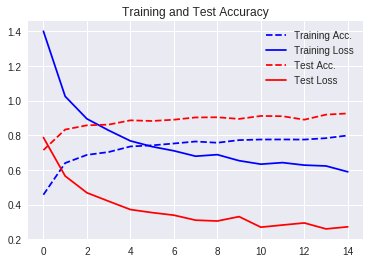

In [0]:
plot_training_history(history)

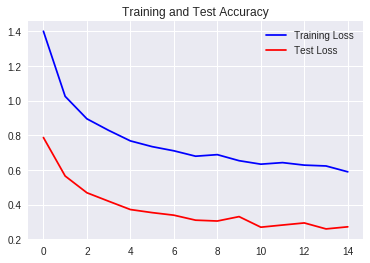

In [0]:
plot_training_history(history)

##Predicitons

In [0]:
def predict_new(image_path):
    
    img = PIL.Image.open(image_path)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    
    plt.imshow(img_resized)
    plt.show()

    img_array = np.expand_dims(np.array(img_resized), axis=0)

    pred = model.predict(img_array)
    print (pred)
    print (class_names[np.argmax(pred)])
    

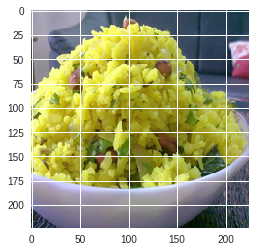

[[0. 1. 0. 0. 0. 0.]]
02_poha


In [0]:
predict_new(image_path='gdrive/My Drive/poha.jpg')


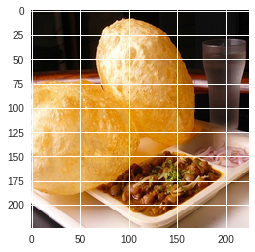

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 4.0703925e-16 1.0000000e+00
  0.0000000e+00]]
05_jalebi


In [0]:
predict_new(image_path='gdrive/My Drive/cb2.jpg')

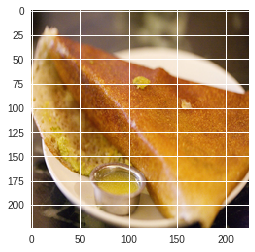

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5955329e-32 0.0000000e+00
  1.0000000e+00]]
06_dosa


In [0]:
predict_new(image_path='gdrive/My Drive/dosa3.jpg')


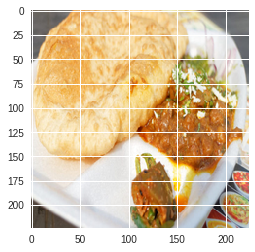

[[0. 0. 0. 0. 1. 0.]]
05_jalebi


In [0]:
predict_new(image_path='gdrive/My Drive/cb.jpg')

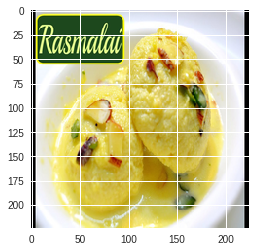

[[0. 0. 0. 1. 0. 0.]]
04_gulab_jamun


In [0]:
predict_new(image_path='gdrive/My Drive/rm3.jpg')


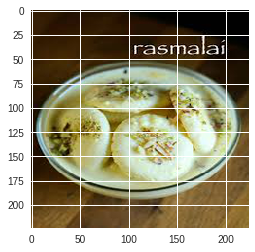

[[5.3647206e-29 8.3414285e-08 9.9999988e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
03_chole_bhature


In [0]:
predict_new(image_path='gdrive/My Drive/rm4.jpeg')


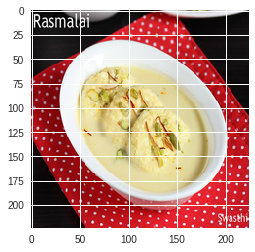

[[1.0000000e+00 2.6288261e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
01_rasmalai


In [0]:
predict_new(image_path='gdrive/My Drive/rm.jpg')


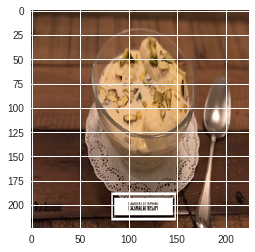

[[0.0000000e+00 0.0000000e+00 6.3903933e-18 1.0000000e+00 0.0000000e+00
  0.0000000e+00]]
04_gulab_jamun


In [0]:
predict_new(image_path='gdrive/My Drive/rm2.jpg')


In [0]:
class_names

['01_rasmalai',
 '02_poha',
 '03_chole_bhature',
 '04_gulab_jamun',
 '05_jalebi',
 '06_dosa']

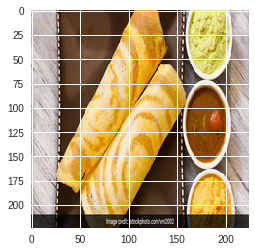

[[0. 1. 0. 0. 0. 0.]]
02_poha


In [0]:
predict_new(image_path='gdrive/My Drive/dosa5.jpg')


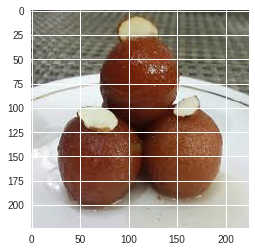

[[0. 0. 0. 1. 0. 0.]]
04_gulab_jamun


In [0]:
predict_new(image_path='gdrive/My Drive/gj.jpeg')


## Eval

In [0]:
result = model.evaluate_generator(generator_test, steps=steps_test)

In [0]:
print("Test-set classification accuracy: {0:.2%}".format(result[1])) ## Last Time's Results

Test-set classification accuracy: 89.75%


In [0]:
result = model.evaluate_generator(generator_test, steps=steps_test)

In [0]:
print("Test-set classification accuracy2019: {0:.2%}".format(result[1]))

Test-set classification accuracy2019: 92.42%


## Save Model

In [0]:

model.save_weights("pretrain_food.h5")

In [0]:
from google.colab import files
files.download('pretrain_food.h5')

##Finetuning with Pretrained Weights

In [0]:
base_model = VGG16(include_top=False, weights=None)

In [0]:
x = base_model.output
x = Dense(128)(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [0]:
model3 = Model(inputs=base_model.input, outputs=predictions)

In [0]:
model3.load_weights("pretrain_food.h5")

In [0]:
model3.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),metrics=["categorical_accuracy"])

In [0]:
model3.trainable = True

In [0]:
for layer in model.layers:
    
   # trainable = ('block5' in layer.name or 'block4' in layer.name)
    
    layer.trainable = True


In [0]:
print_layer_trainable(model3)

False:	input_7
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool
True:	dense_11
True:	global_average_pooling2d_6
True:	dropout_6
True:	dense_12


In [0]:
import time 
t=time.time()
history2 = model3.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_train,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)
tic=time.time()
print("That took ",tic-t)


#5:12pm pe 3rd epoch was running

Epoch 1/15
101/101 [==============================] - 19s 192ms/step - loss: 1.3743 - categorical_accuracy: 0.5281 - val_loss: 0.9090 - val_categorical_accuracy: 0.6667
Epoch 2/15
101/101 [==============================] - 18s 179ms/step - loss: 0.9693 - categorical_accuracy: 0.6337 - val_loss: 1.2155 - val_categorical_accuracy: 0.7273
Epoch 3/15
101/101 [==============================] - 18s 179ms/step - loss: 0.7159 - categorical_accuracy: 0.7723 - val_loss: 0.3642 - val_categorical_accuracy: 0.9394
Epoch 4/15
101/101 [==============================] - 18s 179ms/step - loss: 0.8004 - categorical_accuracy: 0.7690 - val_loss: 0.1428 - val_categorical_accuracy: 0.9848
Epoch 5/15
101/101 [==============================] - 18s 178ms/step - loss: 0.6314 - categorical_accuracy: 0.8020 - val_loss: 0.2496 - val_categorical_accuracy: 0.9091
Epoch 6/15
101/101 [==============================] - 18s 177ms/step - loss: 0.6377 - categorical_accuracy: 0.7558 - val_loss: 0.4609 - val_categorical_acc

In [0]:
print("That took ",(tic-t)/60,"Mins")

That took  4.545370328426361 Mins


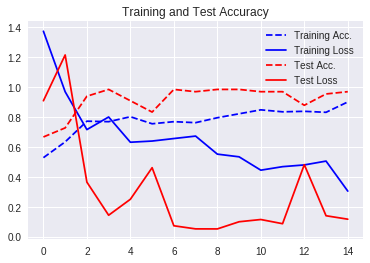

In [0]:
plot_training_history(history2)

In [0]:
model2.save_weights("finetune_food.h5")

In [0]:
model2.save('ft98_model.h5')

In [0]:
files.download('finetune_food.h5')

In [0]:
files.download('ft98_model.h5')

##Predicitons

In [0]:
def predict_new(image_path):
    
    img = PIL.Image.open(image_path)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    
    plt.imshow(img_resized)
    plt.show()

    img_array = np.expand_dims(np.array(img_resized), axis=0)

    pred = model2.predict(img_array)
    print (pred)
    print (class_names[np.argmax(pred)])
    

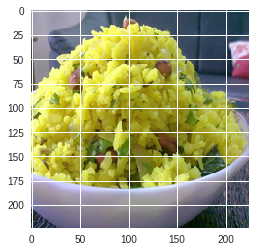

[[0. 1. 0. 0. 0. 0.]]
02_poha


In [0]:
predict_new(image_path='gdrive/My Drive/poha.jpg')


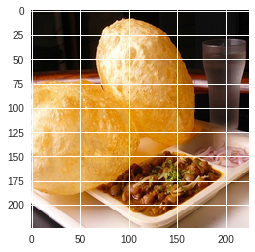

[[0. 0. 1. 0. 0. 0.]]
03_chole_bhature


In [0]:
predict_new(image_path='gdrive/My Drive/cb2.jpg')

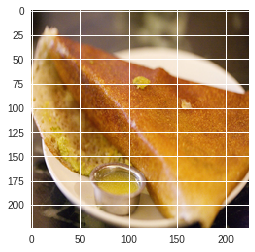

[[0.00000e+00 0.00000e+00 0.00000e+00 1.79461e-33 0.00000e+00 1.00000e+00]]
06_dosa


In [0]:
predict_new(image_path='gdrive/My Drive/dosa3.jpg')


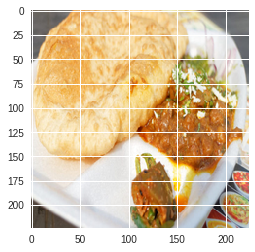

[[0. 0. 1. 0. 0. 0.]]
03_chole_bhature


In [0]:
predict_new(image_path='gdrive/My Drive/cb.jpg')

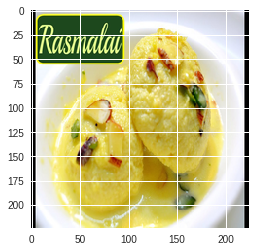

[[1. 0. 0. 0. 0. 0.]]
01_rasmalai


In [0]:
predict_new(image_path='gdrive/My Drive/rm3.jpg')


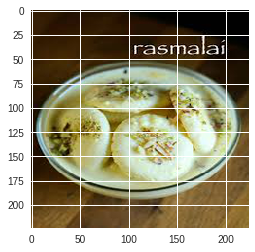

[[1. 0. 0. 0. 0. 0.]]
01_rasmalai


In [0]:
predict_new(image_path='gdrive/My Drive/rm4.jpeg')


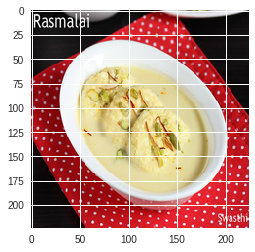

[[1. 0. 0. 0. 0. 0.]]
01_rasmalai


In [0]:
predict_new(image_path='gdrive/My Drive/rm.jpg')


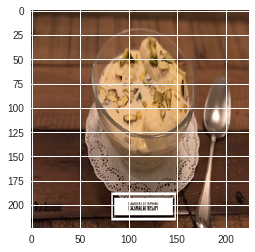

[[1. 0. 0. 0. 0. 0.]]
01_rasmalai


In [0]:
predict_new(image_path='gdrive/My Drive/rm2.jpg')


In [0]:
class_names

['01_rasmalai',
 '02_poha',
 '03_chole_bhature',
 '04_gulab_jamun',
 '05_jalebi',
 '06_dosa']

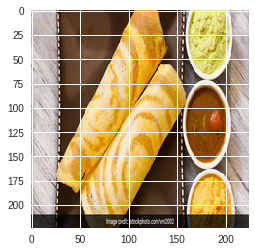

[[6.3704839e-18 5.7902574e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00]]
06_dosa


In [0]:
predict_new(image_path='gdrive/My Drive/dosa5.jpg')


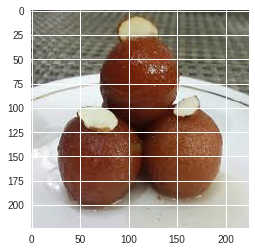

[[0. 0. 0. 1. 0. 0.]]
04_gulab_jamun


In [0]:
predict_new(image_path='gdrive/My Drive/gj.jpeg')


##

In [0]:
result2 = new_model.evaluate_generator(generator_test, steps=steps_test)

In [0]:
print("Test-set classification accuracy: {0:.2%}".format(result2[1])) ##Previous time's final result

Test-set classification accuracy: 91.80%


In [0]:
result_ft2019 = model3.evaluate_generator(generator_test, steps=steps_test)

In [0]:
print("Test-set classification accuracy2019: {0:.2%}".format(result_ft2019[1])) ## This time's final result

Test-set classification accuracy2019: 98.48%


## *So that's a 7% increase in accuracy*